In [332]:
from lxml import html
import requests
import numpy as np
import ast
import matplotlib.pyplot as plt
import time
import datetime
from datetime import datetime
import pandas as pd

In [293]:
page = requests.get('https://www.windfinder.com/weatherforecast/lippesee_paderborn')
tree = html.fromstring(page.content)

page_station = requests.get('http://www.svpb.de/lippesee/wetter-station')
tree_station = html.fromstring(page_station.content)
print(tree_station)

<Element html at 0x7f66c08855e8>


In [382]:
def knts_2_ms(knts):
    return 0.514444*knts

def ms_2_knts(ms):
    return ms/0.514444

def get_list_(tree, path):
    return list(map(int, tree.xpath(path)))


def post_process_table_data(wind_actual, time_actual):
    
    wind_actual = [s[s.find("[")+1:s.find("]")] for s in wind_actual]
    wind_actual.pop(0)
    wind_actual = np.array([ast.literal_eval(s) for s in wind_actual])

    
    df = pd.DataFrame(wind_actual)
    df.columns = ['date', 'average', 'max']
    df['date'] = pd.to_datetime(wind_actual[:,0])
    df['date'][:49] = df['date'][:49] -  pd.to_timedelta(1, unit='d')
    df['average']  = ms_2_knts(wind_actual[:,1].astype(np.float))
    df['max']  = ms_2_knts(wind_actual[:,2].astype(np.float))
    
    return df

In [4]:
ms_2_knts(3.2)

6.220307749725918

In [383]:
# list of something
day1 = tree.xpath('/html/body/main/div[2]/div/div[1]/section[1]/section[1]/div/div[1]/h4/text()')[0]
day1 = (day1[day1.find(",")+2:])

wind_speed_max = list(map(int, tree.xpath(
    '//*[@id="frame"]/div/div[1]/section[1]/section[1]/div/div[2]/div/div[5]/div[2]/span[2]/text()'
    )))
wind_speed_average = list(map(int,tree.xpath(
    '//*[@id="frame"]/div/div[1]/section[1]/section[1]/div/div[2]/div/div[5]/div[1]/div[1]/span/span[1]/text()'
    )))
year = '18'
path_forecast_hour = '//*[@id="frame"]/div/div[1]/section[1]/section[1]/div/div[2]/div/div[2]/div/span/text()'
forecast_hour = tree.xpath(path_forecast_hour)
forecast_time = [datetime.strptime(year + " " + day1+" "+ hour[:-1], '%y %b %d %H') for hour in forecast_hour]

wind_forecast = np.array([forecast_time, wind_speed_average, wind_speed_max])

path_wind_actual = '//*[@id="c962"]/div/div[4]/script/text()'

path_time_actual = '//*[@id="c962"]/div/div[1]/div/p/text()'

time_actual = tree_station.xpath(path_time_actual)

time_actual = time_actual[0][time_actual[0].find(":")+1:]

time_actual = datetime.strptime(time_actual.strip(),'%d.%m.%y %H:%M')
#wind_actual_average = get_list(tree_station, path_wind_actual_average)

wind_actual = tree_station.xpath(
    path_wind_actual
    )


#print(df.index)
wind_actual = post_process_table_data(wind_actual, time_actual)

print(wind_actual)

                  date    average        max
0  2018-05-04 11:57:00   8.941692  12.051846
1  2018-05-04 12:12:00   7.581000  11.079923
2  2018-05-04 12:27:00   7.581000  10.108000
3  2018-05-04 12:42:00   1.749462   6.414692
4  2018-05-04 12:58:00   5.248385  10.108000
5  2018-05-04 13:13:00   6.414692   9.136077
6  2018-05-04 13:28:00   1.555077   2.721385
7  2018-05-04 13:43:00   0.388769   4.665231
8  2018-05-04 13:58:00   1.166308   2.721385
9  2018-05-04 14:13:00   3.110154  12.051846
10 2018-05-04 14:28:00   4.470846  11.079923
11 2018-05-04 14:43:00   3.887692   6.414692
12 2018-05-04 14:58:00   1.360692   4.665231
13 2018-05-04 15:13:00   1.943846   4.665231
14 2018-05-04 15:28:00   2.527000   4.665231
15 2018-05-04 15:43:00   0.971923   3.693308
16 2018-05-04 15:58:00   1.749462   5.442769
17 2018-05-04 16:13:00   5.054000   9.136077
18 2018-05-04 16:28:00   2.915769   6.414692
19 2018-05-04 16:43:00   0.777538   6.414692
20 2018-05-04 16:58:00   3.693308  11.079923
21 2018-05

/home/magnus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


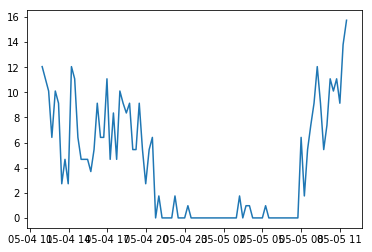

In [385]:

#plt.plot(wind_forecast[0],wind_forecast[2])
#plt.plot( wind_actual['date'])
#plt.plot(wind_forecast[0], wind_forecast[1])
plt.plot(wind_actual['date'], wind_actual['max'])


<function matplotlib.pyplot.show>

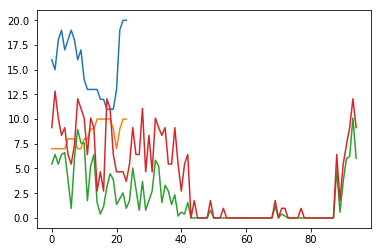

In [156]:
plt.plot(wind_speed_max)
plt.plot(wind_speed_average)
plt.plot(ms_2_knts(wind_actual[1]))
plt.plot(ms_2_knts(wind_actual[2]))
plt.show

In [7]:
print(tree)

<Element html at 0x7f66c10f7728>
